In [2]:
import pandas as pd
import numpy as np
import researchpy as rp
from scipy import stats

import matplotlib.pyplot as plt
import pydotplus
from matplotlib import rcParams
import seaborn as sb

from collections import Counter

In [4]:
# No Chnages were done during EDA so we use the encoded file - 1_ITSM_cleansed_Encoded.csv
df1 = pd.read_csv('1_ITSM_cleansed_Encoded.csv')
df1.columns

Index(['c_CI_Cat', 'c_Closure_Code', 'c_WBS', 'q_No_of_Reassignments',
       'q_No_of_Related_Incidents', 'q_No_of_Related_Interactions',
       't_Close_Time', 't_Open_Time', 't_ReopenFlag',
       't_TicketWIPDurationDays', 'y_Priority'],
      dtype='object')

In [5]:
# Setting the lists
CatVarList = ['c_CI_Cat', 'c_CI_Name', 'c_CI_Subcat', 'c_Closure_Code', 'c_WBS','t_ReopenFlag']
ConVarList = ['q_No_of_Reassignments', 'q_No_of_Related_Incidents','q_No_of_Related_Interactions','t_TicketWIPDurationDays']
DatVarList = ['t_Close_Time', 't_Open_Time']
OutValList = ['y_Priority']

In [6]:
df1.head()

c_CI_Cat  c_Closure_Code  c_WBS  q_No_of_Reassignments  \
0        11               4    126                     26   
1         1               6     65                     33   
2         1               3     65                     13   
3         1               4     65                      2   
4         1               4     65                      4   

   q_No_of_Related_Incidents  q_No_of_Related_Interactions  \
0                        2.0                           1.0   
1                        1.0                           1.0   
2                        0.0                           1.0   
3                        0.0                           1.0   
4                        0.0                           1.0   

          t_Close_Time          t_Open_Time  t_ReopenFlag  \
0  2013-11-04 13:51:00  2012-02-05 13:32:00             0   
1  2013-12-02 12:36:00  2012-03-12 15:44:00             1   
2  2013-11-14 09:31:00  2012-07-17 11:49:00             0   
3  2013-11-08 13:55:00  2012-08-10 11:01:00             0   
4  2013-11-08 13:54:00  2012-08-10 11:27:00             0   

   t_TicketWIPDurationDays  y_Priority  
0               638.013194           3  
1               629.869444           2  
2               484.904167           3  
3               455.120833           3  
4               455.102083           3

## Full Correlation matrix

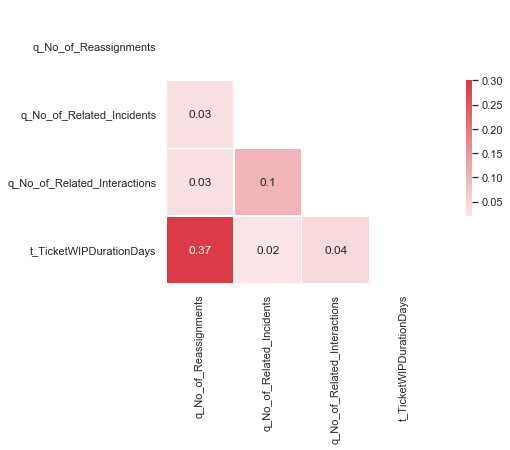

In [7]:
# Run Correlation on continuous varibales
Corr_All= df1[ConVarList].corr().round(2)
# Masking of upper traingle
sb.set(style="white")
mask = np.zeros_like(Corr_All, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Plotting
rcParams['figure.figsize'] = 10,5
sb.heatmap(Corr_All,annot = True,mask=mask,cmap = sb.diverging_palette(220, 10, as_cmap=True),vmax=.3,center=0,square=True,linewidths=.5,cbar_kws={"shrink": .5})

#The Correaltion Between the predictors is less hence none get deleted

In [8]:
# There are 258 wbse which doent make sense as it cannot indicate any department So we delete it
# Delete t_Reopen_Time & Category column
DeletColList = ['c_WBS']

# Delete the listed columns / features
df1.drop(DeletColList, inplace=True, axis=1)

# Index the columns to keep catagorical, continous and outcome separately
df1=df1.sort_index(axis=1)

df1.head()

c_CI_Cat  c_Closure_Code  q_No_of_Reassignments  q_No_of_Related_Incidents  \
0        11               4                     26                        2.0   
1         1               6                     33                        1.0   
2         1               3                     13                        0.0   
3         1               4                      2                        0.0   
4         1               4                      4                        0.0   

   q_No_of_Related_Interactions         t_Close_Time          t_Open_Time  \
0                           1.0  2013-11-04 13:51:00  2012-02-05 13:32:00   
1                           1.0  2013-12-02 12:36:00  2012-03-12 15:44:00   
2                           1.0  2013-11-14 09:31:00  2012-07-17 11:49:00   
3                           1.0  2013-11-08 13:55:00  2012-08-10 11:01:00   
4                           1.0  2013-11-08 13:54:00  2012-08-10 11:27:00   

   t_ReopenFlag  t_TicketWIPDurationDays  y_Priority  
0             0               638.013194           3  
1             1               629.869444           2  
2             0               484.904167           3  
3             0               455.120833           3  
4             0               455.102083           3

In [9]:
# Saving the file with normal encoding. and Masked after saving
df1.to_csv("3_ITSM_cleansed_Encoded_Engineered.csv",index=False)